# DATA ANALYSIS OF MOVIES DATABASE

# 1. import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. load dataset

In [2]:
df=pd.read_csv("tv_shows.csv",index_col=[0])

In [3]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


# 3. Explore dataset

In [4]:
df.shape

(5611, 10)

In [5]:
df.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [6]:
df.IMDb.describe()

count    4450.000000
mean        7.113258
std         1.132060
min         1.000000
25%         6.600000
50%         7.300000
75%         7.900000
max         9.600000
Name: IMDb, dtype: float64

# 4. Clean Data

In [7]:
df.duplicated()
#There is no duplicate values in dataset

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5611, dtype: bool

In [8]:
df.isnull()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5606,False,False,True,True,True,False,False,False,False,False
5607,False,False,True,True,True,False,False,False,False,False
5608,False,False,True,True,True,False,False,False,False,False
5609,False,False,True,True,True,False,False,False,False,False


In [9]:
df.isnull().sum() #There are null values in database

Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [10]:
df.dropna(axis=0).shape

(931, 10)

In [11]:
df.dropna(axis=0,inplace=True) 

In [12]:
df.isnull().sum() #now there are no null values in Database

Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
type               0
dtype: int64

In [13]:
df.dtypes 

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object

# Q-1:What are the top 10 rated movies according to Rotten Tomatoes?

In [14]:
df.rename(columns={"Rotten Tomatoes" : "RottenTomatoes"},inplace=True)

In [15]:
df.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [16]:
#to change datatype of RottenTomatoes from object to int64 and remove % .
df['RottenTomatoes']=df.RottenTomatoes.apply(lambda x: x.replace("%"," ")).astype("int64")

In [17]:
df.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97,1,0,0,0,1


In [18]:
df.RottenTomatoes.dtype

dtype('int64')

In [19]:
df.sort_values(by = 'RottenTomatoes',ascending=False)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,100,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,100,1,0,0,0,1
1972,Black Books,2000,7+,8.5,100,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,100,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5506,Marvel's Inhumans,2017,7+,5.0,11,0,0,0,1,1
2540,Rosewood,2015,16+,6.7,9,0,1,0,0,1
2958,Saved by the Bell: The College Years,1993,7+,6.3,9,0,1,0,0,1
840,The I-Land,2019,18+,4.5,8,1,0,0,0,1


In [20]:
#By using head we get top 10 records
TopTen=df.sort_values(by = 'RottenTomatoes',ascending=False).head(10)

In [21]:
TopTen
#These are top ten rated movies according to Rotten Tomatoes

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,100,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,100,1,0,0,0,1
1972,Black Books,2000,7+,8.5,100,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,100,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,100,1,0,0,0,1
238,Voltron: Legendary Defender,2016,7+,8.1,100,1,0,0,0,1
1981,Steins;Gate,2011,16+,8.8,100,0,1,0,0,1
2414,Spy,2011,7+,7.9,100,0,1,0,0,1
2908,Sherman's Showcase,2019,18+,5.4,100,0,1,0,0,1
202,Soul Eater,2008,16+,7.8,100,1,1,0,0,1


# Q.2:What are the top ten rated movies on IMDb?

In [22]:
#by using head function we find 10 records
TopTenIMDb=df.sort_values(by="IMDb",ascending=False ).head(10)

In [23]:
TopTenIMDb
#These are 10 top rated movies on IMDb

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
3567,Band of Brothers,2001,18+,9.4,94,0,0,1,0,1
91,Our Planet,2019,7+,9.3,93,1,0,0,0,1
3566,The Wire,2002,18+,9.3,94,0,0,1,0,1
1931,Rick and Morty,2013,18+,9.2,94,0,1,0,0,1
3568,The Sopranos,1999,18+,9.2,92,0,0,1,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,100,1,0,0,0,1
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100,1,1,0,0,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
3649,The Planets,2019,all,9.1,100,0,0,1,0,1


# Q.3: How many movies have a 18+ restriction?

In [24]:
df[df['Age']=='18+'].count()

Title             376
Year              376
Age               376
IMDb              376
RottenTomatoes    376
Netflix           376
Hulu              376
Prime Video       376
Disney+           376
type              376
dtype: int64

In [25]:
#There are 376 movies which have a 18+ restriction.

# Q.4:How many movies from the database were made in 2010 and have an IMDb rating of >=5?

In [26]:
df[(df['Year']==2010) & (df['IMDb']>=5)].count()

Title             24
Year              24
Age               24
IMDb              24
RottenTomatoes    24
Netflix           24
Hulu              24
Prime Video       24
Disney+           24
type              24
dtype: int64

In [27]:
#There are 24 movies in 2010 whose IMDb rating is less than 5.

# Q.5:How many different age categories are there?

In [28]:
Age_group=df.Age.unique()

In [29]:
Age_group

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [30]:
#18+,16+,7+,13+,all these are age categories in age column

In [31]:
Age_group=df.groupby("Age").Title.count()

In [32]:
Age_group

Age
13+      3
16+    359
18+    376
7+     177
all     16
Name: Title, dtype: int64

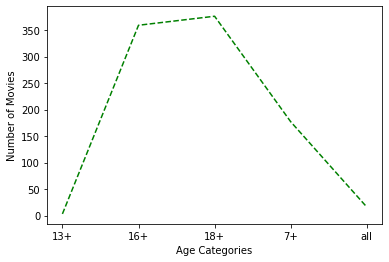

In [33]:
#graphical representation of age group with respect to number of movies
plt.plot(Age_group,'g--')
plt.xlabel("Age Categories")
plt.ylabel("Number of Movies")
plt.show()

# Q.6:Graph number of movies catagorized by age restrictions before 2000 and after 2000?

In [34]:
YearGroup=df.Year.unique()

In [35]:
YearGroup

array([2008, 2016, 2017, 2010, 2015, 2005, 2011, 2013, 2009, 2006, 2019,
       1990, 2014, 2018, 2007, 2003, 2020, 1999, 2012, 1959, 1987, 1966,
       2000, 1995, 1969, 1998, 1993, 1988, 2004, 1992, 2001, 1989, 2002,
       1997, 1991, 1981, 1963, 1978, 1964], dtype=int64)

In [36]:
YearGroup.min()

1959

In [37]:
YearGroup.max()

2020

In [38]:
Before2000=df[(df.Year <=2000)]

In [39]:
Before2000.count()

Title             60
Year              60
Age               60
IMDb              60
RottenTomatoes    60
Netflix           60
Hulu              60
Prime Video       60
Disney+           60
type              60
dtype: int64

In [40]:
MoviesBefore2000=Before2000.groupby("Age").Title.count()

In [41]:
MoviesBefore2000

Age
13+     1
16+    14
18+    13
7+     27
all     5
Name: Title, dtype: int64

In [42]:
#There are 13 movies which have age restrictions before 2000

In [43]:
After2000=df[(df.Year >2000)]

In [44]:
After2000.count()

Title             871
Year              871
Age               871
IMDb              871
RottenTomatoes    871
Netflix           871
Hulu              871
Prime Video       871
Disney+           871
type              871
dtype: int64

In [45]:
MoviesAfter2000=After2000.groupby("Age").Title.count()

In [46]:
MoviesAfter2000

Age
13+      2
16+    345
18+    363
7+     150
all     11
Name: Title, dtype: int64

In [47]:
#There are 363 movies which have age restrictions after 2000

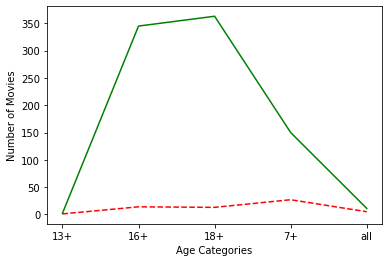

In [48]:
#Graphical representation of MoviesBefore2000 & MoviesAfter2000
plt.plot(MoviesBefore2000, 'r--')
plt.plot(MoviesAfter2000,"g")
plt.xlabel("Age Categories")
plt.ylabel("Number of Movies")
plt.show()

# Q.7:Graph the same but using percentage of the movies

In [49]:
PercentageBefore2000=MoviesBefore2000/sum(MoviesBefore2000)

In [50]:
PercentageAfter2000=MoviesAfter2000/sum(MoviesAfter2000)

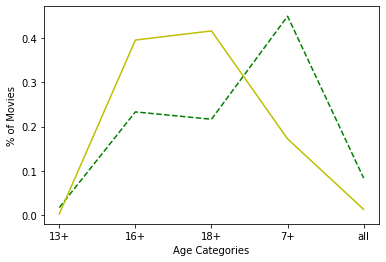

In [51]:
#Graphical representation of percentage of PercentageBefore2000 & PercentageAfter2000
plt.plot(PercentageBefore2000, 'g--')
plt.plot(PercentageAfter2000,"y")
plt.xlabel("Age Categories")
plt.ylabel("% of Movies")
plt.show()